UCI Heart Disease Dataset:


In [1]:
# Import the libraries we will be using on this Task for Visualization, utilizing Sklearn Features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
%matplotlib inline

df = pd.read_csv('/heart.csv')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [2]:
#Getting the starting rows the dataset for overiew
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#prints the shape of the dataset
df.shape

(303, 14)

In [4]:
#Info provide details information(datatype & Non-Null count) about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#describe show more statistical analysis on out columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#counting on if there is null vaue present in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

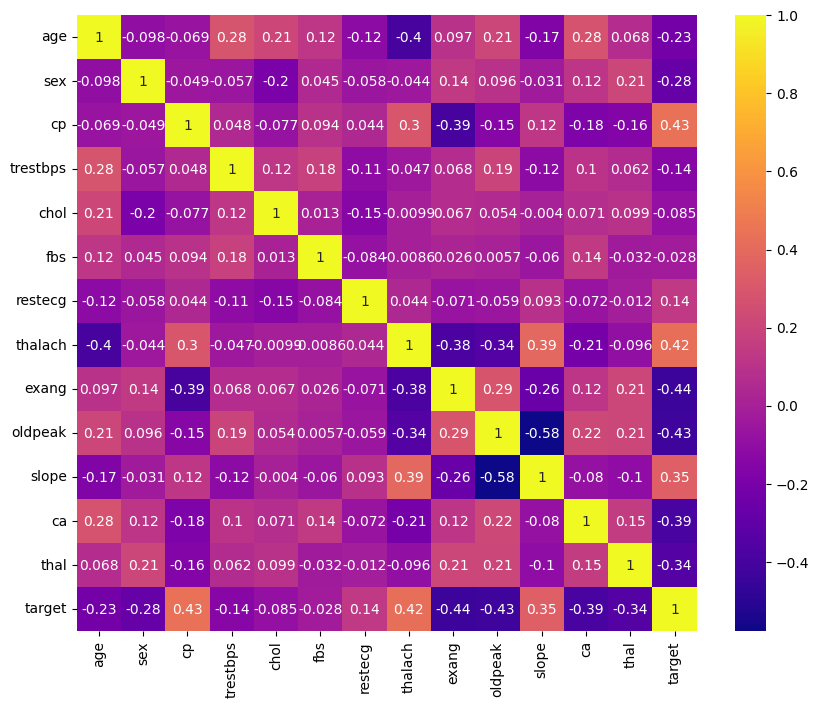

In [7]:
#find the pairwise correlation of all the columns in the DataFrame.
corr_df = df.corr()
top_features = corr_df.index
plt.figure(figsize=(10,8))
g = sns.heatmap(df[top_features].corr(),annot=True,cmap=plt.cm.plasma)

Text(0.5, 1.0, 'Count of target feature by sex')

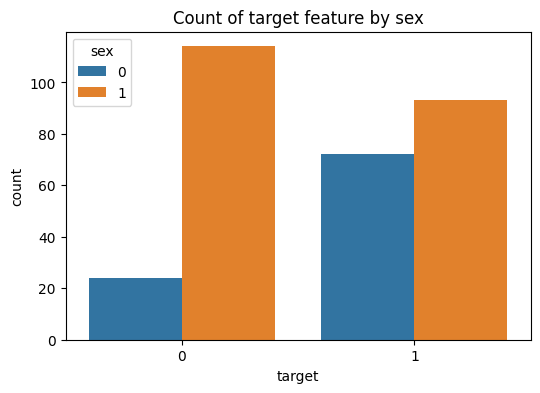

In [8]:
#Visualization on heart attack on different genders
plt.rcParams['figure.figsize'] = (6,4)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

In [9]:
#renaming some columns for understanding better.
df = df.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalach':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()
df

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,max_heart_rate,exercise_angina,oldpeak,slope,vessels_colored,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


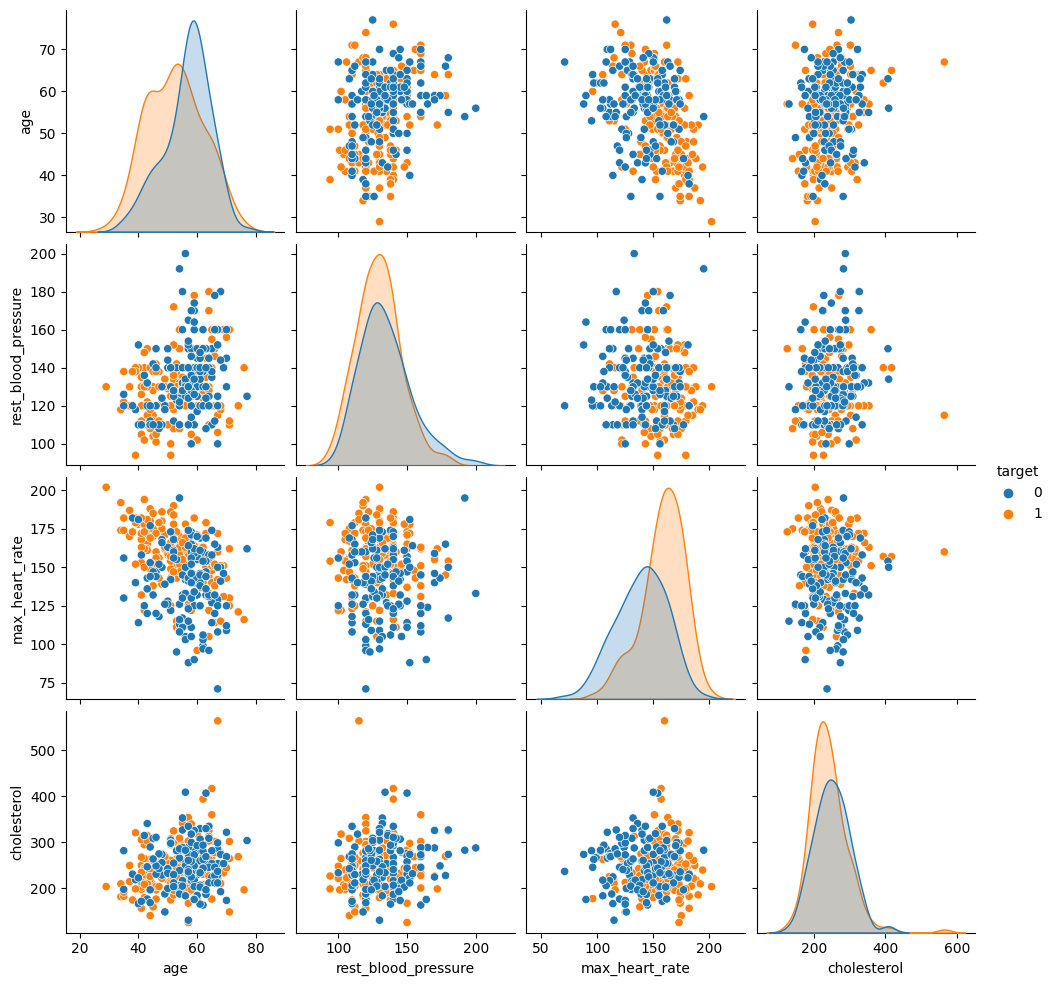

In [10]:
#plotting a paiplot to check different variable with respect to out target variable.
sns.pairplot(df[['age','rest_blood_pressure','max_heart_rate','cholesterol','target']],hue='target',size=2.5);

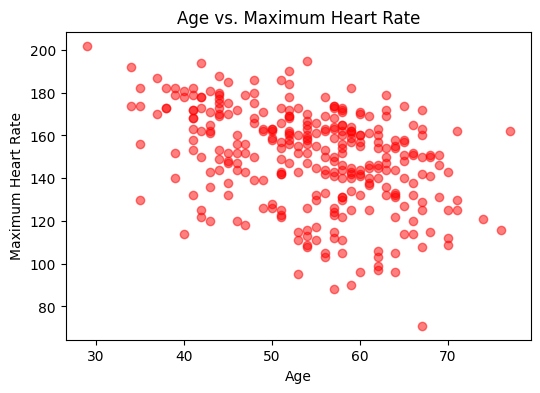

In [11]:
#Age vs Heart Rate
plt.figure(figsize=(6, 4))
plt.scatter(df['age'], df['max_heart_rate'], color='red', alpha=0.5)
plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [12]:
#get_dummies function is used to convert categorical variables into dummy or indicator variables.
dataset = pd.get_dummies(df, columns = ['sex','chest_pain','fast_blood_sugar','rest_ekg','exercise_angina','slope',
                                        'vessels_colored','thal'])

In [13]:
#to normalize/standardize i.e. μ = 0 and σ = 1 your variables of X , individually, before applying any machine learning model
to_scale = ['age','rest_blood_pressure','cholesterol','max_heart_rate','oldpeak']
standardScaler = StandardScaler()
dataset[to_scale] = standardScaler.fit_transform(dataset[to_scale])
dataset.head(5)

,age,rest_blood_pressure,cholesterol,max_heart_rate,oldpeak,target,sex_0,sex_1,chest_pain_0,chest_pain_1,...,slope_2,vessels_colored_0,vessels_colored_1,vessels_colored_2,vessels_colored_3,vessels_colored_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [14]:
#separating the target
X = dataset.drop(['target'],axis = 1)
y = dataset['target']

In [15]:
# for both KNeighborsClassifier(n_neighbors) and RandomForestClassifier(n_estimators) we dont know what numeric value fit for applying that particular
# algorithm for that looping it from 1 to 21 to get the best cross_val_score score.
select_knn = []
select_rm = []
for i in range(1,21):
    knnCLassifier = KNeighborsClassifier(n_neighbors = i)
    kn_score = cross_val_score(knnCLassifier,X,y,cv=10)

    rm_classifier = RandomForestClassifier(n_estimators=i)
    rm_score = cross_val_score(rm_classifier,X,y,cv=10)

    select_knn.append(kn_score.mean())
    select_rm.append(rm_score.mean())

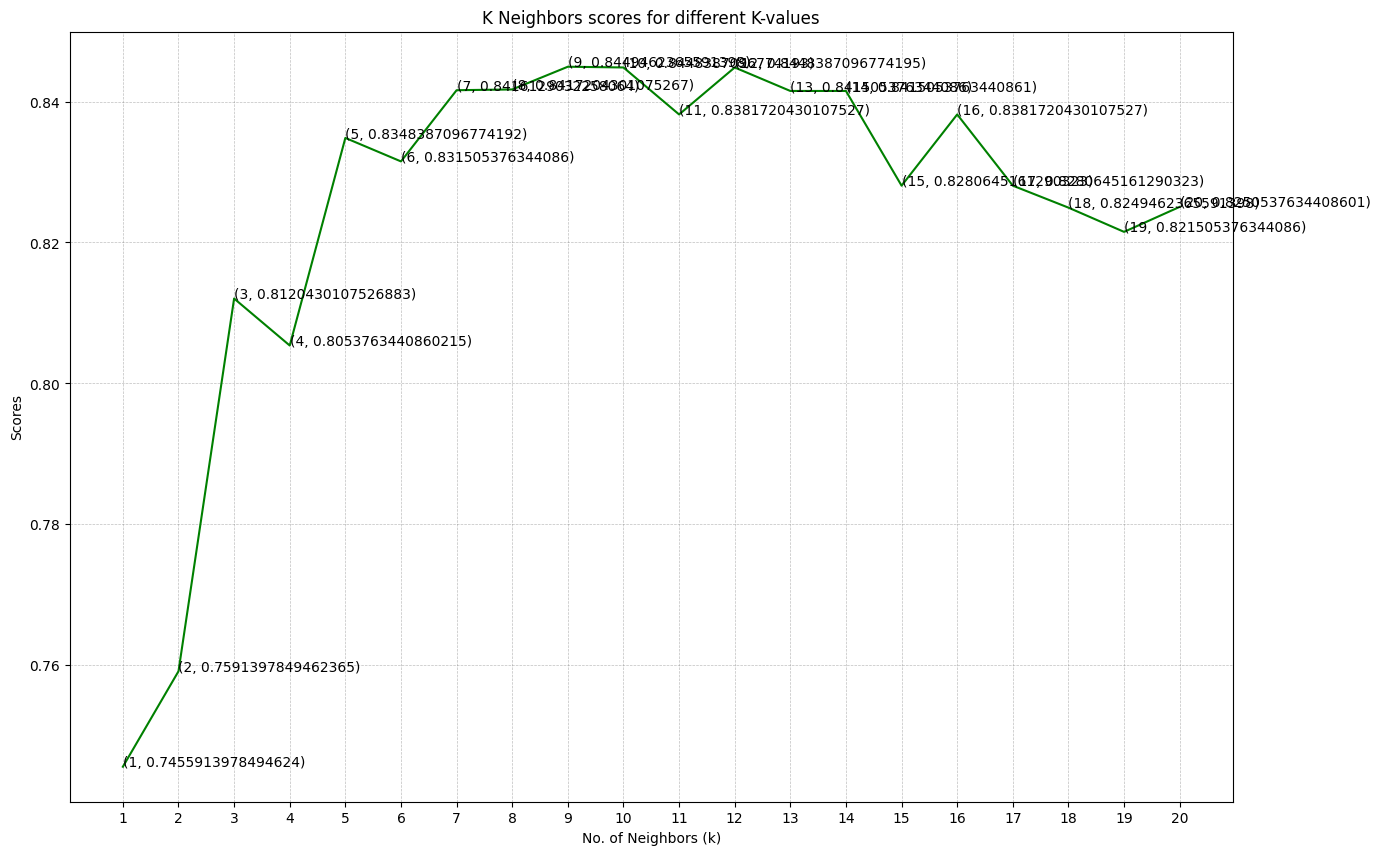

In [16]:
# plotting for KNeighborsClassifier(n_neighbors) on different n_neighbors
plt.figure(figsize=(15, 10))
plt.plot([i for i in range(1,21)],select_knn,color='green')
for j in range(1,21):
    plt.text(j, select_knn[j-1], (j,select_knn[j-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('No. of Neighbors (k)')
plt.ylabel('Scores')
plt.title('K Neighbors scores for different K-values')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)


In [17]:
#KNN Classifier
print(f"Best Score for KNeighborsClassifier :{select_knn.index(max(select_knn))+1}")
knnCLassifier = KNeighborsClassifier(n_neighbors = 12)
kn_score = cross_val_score(knnCLassifier,X,y,cv=10)
kn_score.mean()

Best Score for KNeighborsClassifier :9


0.8448387096774195

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print(f"Best Parameter for KNeighborsClassifier :{random_search.best_params_}")
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"With Hyperparameter Optimization the Accuracy is {accuracy} and without is {kn_score.mean()} ")

Best Parameter for KNeighborsClassifier :{'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}
With Hyperparameter Optimization the Accuracy is 0.8688524590163934 and without is 0.8448387096774195 


In [19]:
#Random Forest
print(f"Best Score for RandomForestClassifier :{select_rm.index(max(select_rm))+1}")
rm_classifier = RandomForestClassifier(n_estimators=17)
rm_score = cross_val_score(rm_classifier,X,y,cv=10)
rm_score.mean()

Best Score for RandomForestClassifier :7


0.8080645161290322

In [20]:
#Hyperparameter Optimization DecisionTreeClassifier using RandomizedSearchCV, as it says, it provides the best parameter to put in out algorithm
# difference is with 0.77 and without is 0.73
dt_classifier = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=params, n_iter=100, cv=5, random_state=42)
random_search.fit(X, y)
best_params = random_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
print(f"Best Parameter for DecisionTreeClassifier :{best_params}")
dt_score = cross_val_score(dt_classifier,X,y,cv=10)
dt_score.mean()
dt_score_best = cross_val_score(best_dt_classifier,X,y,cv=10)
dt_score_best.mean()
print(f"With Hyperparameter Optimization the Accuracy is {dt_score_best.mean()} and without is {dt_score.mean()} ")

Best Parameter for DecisionTreeClassifier :{'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
With Hyperparameter Optimization the Accuracy is 0.7560215053763442 and without is 0.7286021505376344 


In [21]:
#Applying some more algoriths
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
models = [
    LogisticRegression(),
    SVC(),
    GaussianNB(),
]
acc_mod = []
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    acc_mod.append(np.mean(scores))
    print(f'{model.__class__.__name__}: Accuracy: {np.mean(scores):.4f}')


LogisticRegression: Accuracy: 0.8447
SVC: Accuracy: 0.8183
GaussianNB: Accuracy: 0.7884


                     Name  Accuracy
2  DecisionTreeClassifier  0.756022
5              GaussianNB  0.788415
1  RandomForestClassifier  0.808065
4                     SVC  0.818306
3      LogisticRegression  0.844699
0    KNeighborsClassifier  0.868852


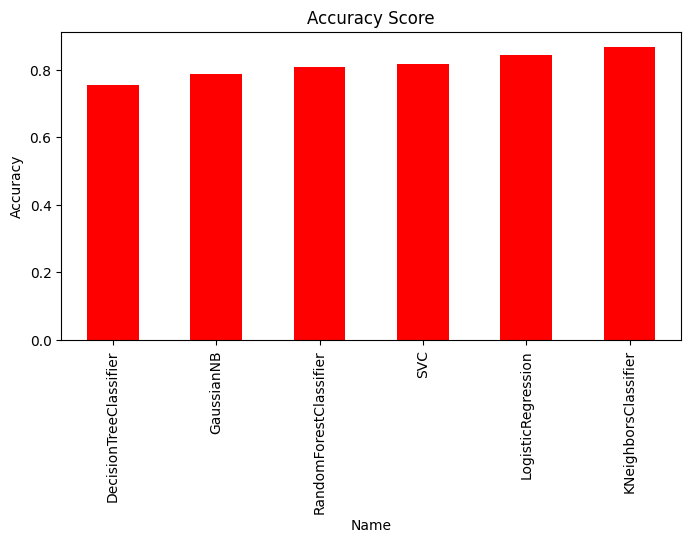

In [22]:
Best_model = [
    {'Name': 'KNeighborsClassifier', 'Accuracy': accuracy},
    {'Name': 'RandomForestClassifier', 'Accuracy': rm_score.mean()},
    {'Name': 'DecisionTreeClassifier', 'Accuracy': dt_score_best.mean()},
    {'Name': 'LogisticRegression', 'Accuracy': acc_mod[0]},
    {'Name': 'SVC', 'Accuracy': acc_mod[1],},
    {'Name': 'GaussianNB', 'Accuracy': acc_mod[2],}
]
df1 = pd.DataFrame(Best_model)
df1 = df1.sort_values(by='Accuracy')
print(df1)
df1.plot(kind='bar', x='Name', y='Accuracy', color='red', legend=False,figsize=(8, 4))
plt.title('Accuracy Score')
plt.xlabel('Name')
plt.ylabel('Accuracy')
plt.show()

In [23]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [24]:
! pip install h2o

In [25]:
#Applying Automl library H20 on out variable and target variable
import h2o
from h2o.automl import H2OAutoML
# init
h2o.init()
aml = H2OAutoML(max_models=10, seed=1)
heart_data = h2o.H2OFrame(df)
x = ['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate',
       'oldpeak']

aml.train(x=x, y='target', training_frame=heart_data)
lb = aml.leaderboard
print(lb)
best_model = aml.get_best_model()
print(best_model)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpht_8xmrg
  JVM stdout: /tmp/tmpht_8xmrg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpht_8xmrg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_gjwxfn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
23:36:05.675: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
23:36:12.97: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
23:36:14.46: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
23:36:18.641: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert yo